# TUTORIAL 4 EXERCISE

## PART 1
A biomaterials engineer has proposed two different topographies for a stent. Each of these two topographies have been investigated for their angiogenesis (blood vessel formation) potential. Angiogenesis activity was measured using a fluorescence-based assays (a.u.) where higher values suggest greater amounts of blood vessel formation.  The engineer wants to decide if there is a differnce between the two different topographies.

__What is the appropriate statistical test for this data and why?__ 

Difference of means independent t-test, students t-test, welch's t-test

__Importing relevant libraries!__

In [36]:
import pandas as pd #library to work with data frames
import numpy as np #library to work with data frames
import matplotlib.pyplot as plt #library to plot figure
import matplotlib.dates as mdates #library for visualization
import seaborn as sns #library to plot figures
import scipy
from scipy import stats
from scipy.stats import t
import statsmodels.api as sm


__Reading the data and generating descriptive statistics.__

In [37]:
#Creating dataset
topographyA = np.array([15.8,17.3,15.7,16.9,18.5,17.3,16.5,18.1])
topographyA_df = pd.DataFrame(topographyA)
topographyB = np.array([18.5,19.4,19.3,20.1,19.6,19,18.5,18])
topographyB_df = pd.DataFrame(topographyB)
df=pd.concat([topographyA_df,topographyB_df],axis="columns")
df.columns=["topographyA","topographyB"]

In [38]:
#Generating Descriptive Statistics for both Datasets
df.describe()

,topographyA,topographyB
count,8.000000,8.000000
mean,17.012500,19.050000
std,1.002051,0.686607
min,15.700000,18.000000
25%,16.325000,18.500000
50%,17.100000,19.150000
75%,17.500000,19.450000
max,18.500000,20.100000


<Axes: >

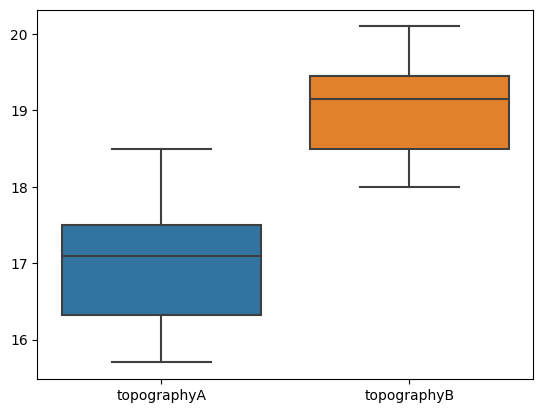

In [39]:
# Generating Plots for both Datasets
sns.boxplot(df)


## PART 2
__What assumptions are you making by choosing this test? Justify why they are acceptable.__  

Shapiro-wilks test indicate that the data is normally distributed (2 points)
Independent datasets (1 point)
Equal variances (2 points)

In [40]:
print("toporgraphyA Shapiro-Wilk Test: ",scipy.stats.shapiro(topographyA))
print("toporgraphyB Shapiro-Wilk Test: ",scipy.stats.shapiro(topographyB))

toporgraphyA Shapiro-Wilk Test:  ShapiroResult(statistic=0.9502197504043579, pvalue=0.7134484052658081)
toporgraphyB Shapiro-Wilk Test:  ShapiroResult(statistic=0.9743107557296753, pvalue=0.9295209050178528)


In [41]:
# levene test
print("Levene Test: ",scipy.stats.levene(topographyA,topographyB))

Levene Test:  LeveneResult(statistic=1.0226628895184167, pvalue=0.3290476256038563)


Think thorugh how to demonstrate normally distributed. Use qq plot and shapiro Wilks test.  

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

Figure(640x480)


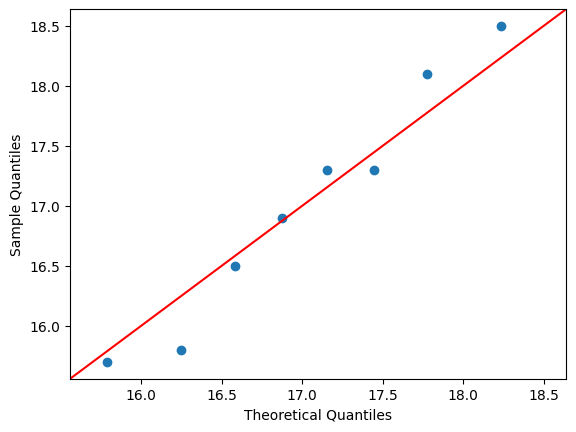

In [42]:
print(sm.qqplot(topographyA,line='45',loc=np.mean(topographyA),scale=np.std(topographyA,ddof=1)))

To use the student's t-test, you must assume that the variances are equal between the groups.  Think thorugh how to demonstrate equal variances, levene’s test 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

Figure(640x480)


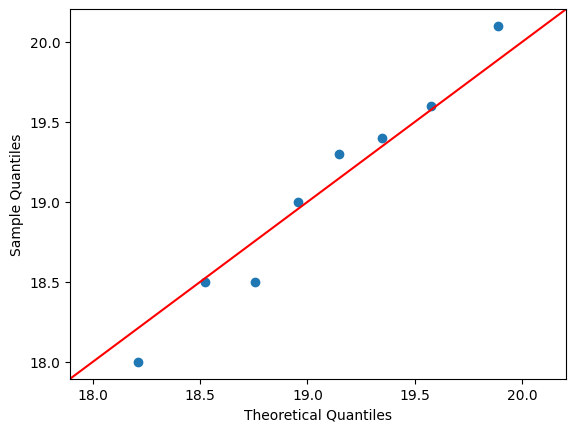

In [43]:
print(sm.qqplot(topographyB,line='45',loc=np.mean(topographyB),scale=np.std(topographyB,ddof=1)))

## PART 3: Provide the 7 steps of the Procedures for Hypothesis Tests
__1. Paramater of Interest__

__2. State the null hypothesis__

__3. State the null hypothesis__

__4. Determine appropriate test statistic__

__5. State the rejection criteria for null hypothesis__

__6. Computations__

__7. Draw Conclusions__

In [44]:
# Step 1: parameter of interest is difference in means
diff = topographyA.mean() - topographyB.mean()


Step 2:  state the null hypothesis

H0: mu1 = mu2 = 0


Step 3: state the alternative hypothesis

H1: mu1 != mu2


Step 4:  test statistic is:  

student's t-test

The t statistic to test whether the means are different can be calculated as follows: \
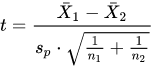

where, with equal varaince, 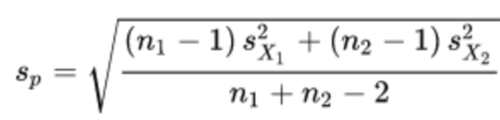

Step 5:  Reject Ho if p < 0.05

The critical values at this alhpa value are t = 2.1447

n − 1 is the number of degrees of freedom for each group, and the total sample size minus two (that is, n1 + n2 − 2) is the total number of degrees of freedom, which is used in significance testing.

14 dof, n1+n2-2 = 8+8-2 = 14

In [45]:
# critical value of t at dof=14 and at alpha/2 = 0.025
stats.t.ppf(0.025,14)

-2.1447866879169277

In [46]:
# critical value of t at dof=14 and at alpha/2 = 0.975
stats.t.ppf(0.975,14)

2.1447866879169273

Step 6 Computations

We will calculate a pooled estimate of the combined standard deviations, which is a weighted average of the two standard deviations, used when the variances are equivalent to each other

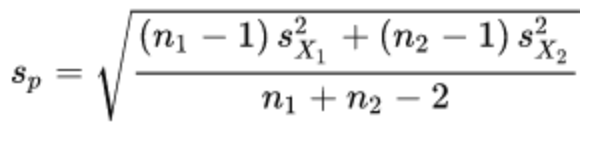

In [47]:
# find the s_pooled value
s_pooled = np.sqrt(((len(topographyA)-1)*np.var(topographyA, ddof=1) + (len(topographyB)-1)*np.var(topographyB, ddof=1)) / (len(topographyA) + len(topographyB) - 2))
print("pooled stdev:", s_pooled)

pooled stdev: 0.8589341401660886


In [48]:
# find the t-statistic
stderrorDiff = s_pooled * np.sqrt(1/len(topographyA) + 1/len(topographyB))
print("standard error of difference:", stderrorDiff)
t_stat = diff / stderrorDiff
print("t-statistic:", t_stat)


standard error of difference: 0.4294670700830443
t-statistic: -4.744251985620267


Step 7:  Conclusions

find the p-value of the t-statistic, make a conclusion, and put it into words using the context of the problem.

In [49]:
# find p-value of the t-statistic
np.mean(topographyA)
np.mean(topographyA) - np.mean(topographyB)
p = 2 * (1 - t.cdf(t_stat, 14))
print("p-value:", p)

p-value: 1.9996861662533612


## PART 4
__Use python to validate the hyptheisis test__

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

e.g.:  stats.ttest_ind(topographyA, topographyB, equal_var=True, alternative="two-sided))

In [50]:
print(stats.ttest_ind(topographyA, topographyB, equal_var=True, alternative='two-sided'))

Ttest_indResult(statistic=-4.744251985620268, pvalue=0.00031383374663875626)


## PART 5
__Compute the corresponding confidence interval for the difference of means.__

Make a conclusion based on the CI, and put into words in the context of the problem.

In [51]:
cm = sm.stats.CompareMeans(sm.stats.DescrStatsW(topographyA), sm.stats.DescrStatsW(topographyB))
print("The 95% difference in mean CI is:", cm.tconfint_diff(usevar='pooled'))

The 95% difference in mean CI is: (-2.9586152548128006, -1.1163847451872022)


In [52]:
# The null hypothesis difference of 0 is not within the CI, confirming that this is a statistically significant difference significantly greater than TopA mean, menaing that TopB would lead to better angiogenesis.

<Axes: >

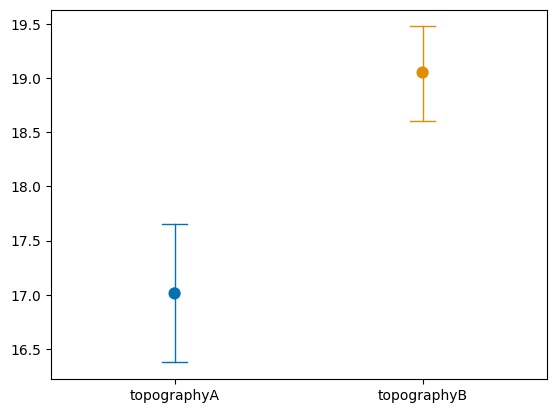

In [54]:
sns.pointplot(data=df, capsize=0.1, errwidth=1, palette='colorblind')